# Depth First Search

Credit: 
1. https://www.askpython.com/python/examples/depth-first-search-algorithm
2. https://likegeeks.com/depth-first-search-in-python/
3. https://www.techiedelight.com/depth-first-search/

## Time complexity
The **time complexity** of **DFS** traversal is **O(V + E)**, where **V** and **E** are the total number of **vertices** and **edges** in the graph, respectively. 

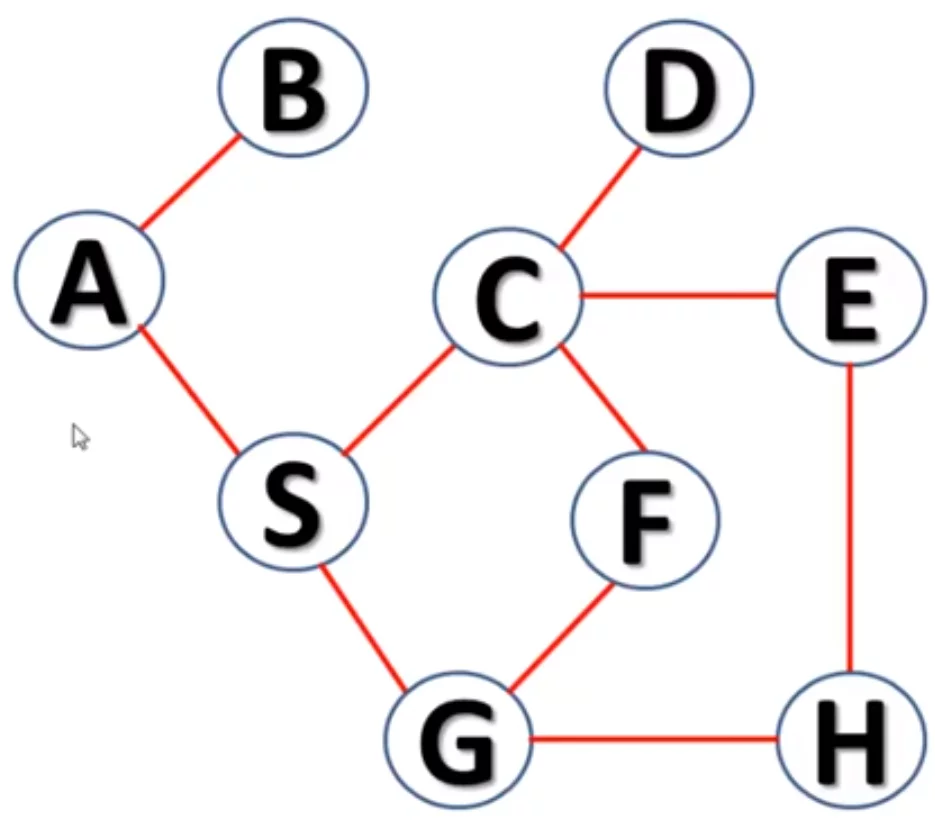

In [1]:
graph1 = {
    'A' : ['B','S'],
    'B' : ['A'],
    'C' : ['D','E','F','S'],
    'D' : ['C'],
    'E' : ['C','H'],
    'F' : ['C','G'],
    'G' : ['F','S'],
    'H' : ['E','G'],
    'S' : ['A','C','G']
}
 
def dfs(graph, node, visited):
    if node not in visited:
        visited.append(node)
        for k in graph[node]:
            dfs(graph,k, visited)
    return visited
 
visited = dfs(graph1,'A', [])
print(visited)

['A', 'B', 'S', 'C', 'D', 'E', 'H', 'G', 'F']


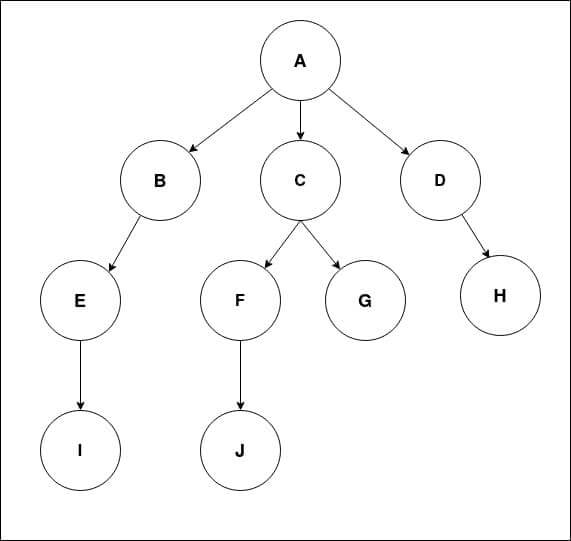

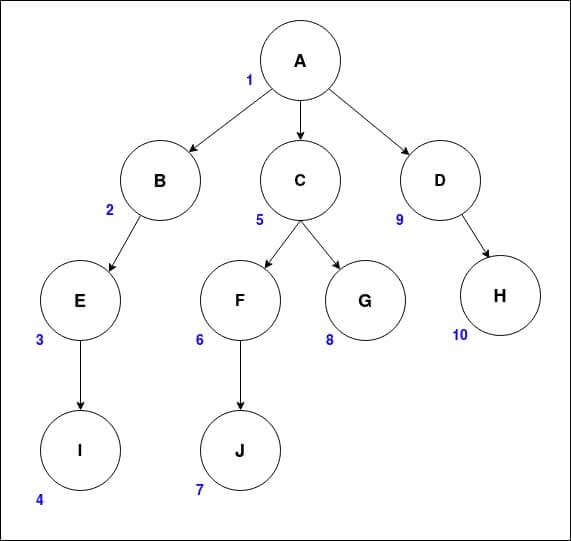

graph = {"A":["D","C","B"], <br>
   "B":["E"], <br>
   "C":["G","F"], <br>
   "D":["H"], <br>
   "E":["I"], <br>
   "F":["J"]} <br>

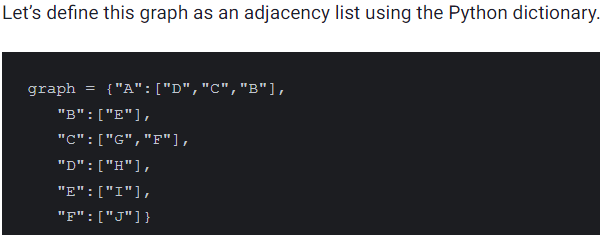

# Depth First Search(a non-recursive approach)

In [2]:
def dfs_non_recursive(graph, source):

       if source is None or source not in graph:

           return "Invalid input"

       path = []

       stack = [source]

       while(len(stack) != 0):

           s = stack.pop()

           if s not in path:

               path.append(s)

           if s not in graph:

               #leaf node
               continue

           for neighbor in graph[s]:

               stack.append(neighbor)

       return " ".join(path)

graph = {"A":["D","C","B"],
"B":["E"],
"C":["G","F"],
"D":["H"],
"E":["I"],
"F":["J"]}

DFS_path = dfs_non_recursive(graph, "A")

print(DFS_path)

A B E I C F J G D H


# DFS using a recursive method

In [3]:
def recursive_dfs(graph, source,path = []):

       if source not in path:

           path.append(source)

           if source not in graph:
               # leaf node, backtrack
               return path

           for neighbour in graph[source]:

               path = recursive_dfs(graph, neighbour, path)


       return path

graph = {"A":["B","C", "D"],
           "B":["E"],
           "C":["F","G"],
           "D":["H"],
           "E":["I"],
           "F":["J"]}


path = recursive_dfs(graph, "A")

print(" ".join(path))

A B E I C F J G D H


In [4]:
# recursive algorithm
# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):
        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]
 
        # add edges to the undirected graph
        for (src, dest) in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)
 
 
# Function to perform DFS traversal on the graph on a graph
def DFS(graph, v, discovered):
 
    discovered[v] = True            # mark the current node as discovered
    print(v, end=' ')               # print the current node
 
    # do for every edge (v, u)
    for u in graph.adjList[v]:
        if not discovered[u]:       # if `u` is not yet discovered
            DFS(graph, u, discovered)
 
 
if __name__ == '__main__':
 
    # List of graph edges as per the above diagram
    edges = [
        # Notice that node 0 is unconnected
        (1, 2), (1, 7), (1, 8), (2, 3), (2, 6), (3, 4),
        (3, 5), (8, 9), (8, 12), (9, 10), (9, 11)
    ]
 
    # total number of nodes in the graph (labelled from 0 to 12)
    n = 13
 
    # build a graph from the given edges
    graph = Graph(edges, n)
 
    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n
 
    # Perform DFS traversal from all undiscovered nodes to
    # cover all connected components of a graph
    for i in range(n):
        if not discovered[i]:
            DFS(graph, i, discovered)
 


0 1 2 3 4 5 6 7 8 9 10 11 12 

## Iterative Implementation of DFS
The non-recursive implementation of DFS is similar to the non-recursive implementation of [BFS](https://https://www.techiedelight.com/breadth-first-search/#iterative) but differs from it in two ways:

1. It uses a [stack](https://https://www.techiedelight.com/stack-implementation/) instead of a [queue](https://www.techiedelight.com/circular-queue-implementation-c/).
2. The DFS should mark discovered only after popping the vertex, not before pushing it.
3. It uses a reverse iterator instead of an iterator to produce the same results as recursive DFS.

In [5]:
from collections import deque
 
 
# A class to represent a graph object
class Graph:
    # Constructor
    def __init__(self, edges, n):
 
        # A list of lists to represent an adjacency list
        self.adjList = [[] for _ in range(n)]
 
        # add edges to the undirected graph
        for (src, dest) in edges:
            self.adjList[src].append(dest)
            self.adjList[dest].append(src)
 
 
# Perform iterative DFS on graph starting from vertex `v`
def iterativeDFS(graph, v, discovered):
 
    # create a stack used to do iterative DFS
    stack = deque()
 
    # push the source node into the stack
    stack.append(v)
 
    # loop till stack is empty
    while stack:
 
        # Pop a vertex from the stack
        v = stack.pop()
 
        # if the vertex is already discovered yet, ignore it
        if discovered[v]:
            continue
 
        # we will reach here if the popped vertex `v` is not discovered yet;
        # print `v` and process its undiscovered adjacent nodes into the stack
        discovered[v] = True
        print(v, end=' ')
 
        # do for every edge (v, u)
        adjList = graph.adjList[v]
        for i in reversed(range(len(adjList))):
            u = adjList[i]
            if not discovered[u]:
                stack.append(u)
 
 
if __name__ == '__main__':
 
    # List of graph edges as per the above diagram
    edges = [
        # Notice that node 0 is unconnected
        (1, 2), (1, 7), (1, 8), (2, 3), (2, 6), (3, 4),
        (3, 5), (8, 9), (8, 12), (9, 10), (9, 11)
        # (6, 9) introduces a cycle
    ]
 
    # total number of nodes in the graph (labelled from 0 to 12)
    n = 13
 
    # build a graph from the given edges
    graph = Graph(edges, n)
 
    # to keep track of whether a vertex is discovered or not
    discovered = [False] * n
 
    # Do iterative DFS traversal from all undiscovered nodes to
    # cover all connected components of a graph
    for i in range(n):
        if not discovered[i]:
            iterativeDFS(graph, i, discovered)
 


0 1 2 3 4 5 6 7 8 9 10 11 12 